# Google Colab Lab Assignment - 6

**Course Name:** Deep Learning (PEC)  
**Lab Title:** Study of Encoder-Decoder Architectures with Attention Mechanisms

**Student Name:** Avishkar Pawar  
**Student ID:** 202201040040  
**Date of Submission:** 09/04/2025  

**Group Members:**  
1) Avishkar Pawar  
2) Sanket Kolhe  
3) Swapnil Solankar  

---

### **Objective**

To implement and compare different encoder-decoder architectures:
- Without Attention (LSTM/GRU-based)
- With Attention (Bahdanau/Luong)
- With Self-Attention (Transformer)


## 🧠 Theory: Encoder-Decoder Architecture (Without Attention)

The encoder-decoder model is a neural network design originally introduced for tasks like **machine translation**, but it's also effective for **text generation**, **summarization**, and **paraphrasing**—as in your program.

---

### 🔄 Overview: What It Does

- **Input**: A sentence (sequence of words) in the source language (or format).
- **Output**: A new sentence (paraphrase) in the same or different format.

The architecture consists of two main parts:

---

### 1. 🧩 Encoder: Compresses Input

The **encoder** reads the input sequence (e.g., `["How", "are", "you"]`) and **compresses** all that information into a single **context vector** (a fixed-size hidden state).

**Steps:**
- Input tokens are embedded (converted into dense vectors).
- These vectors are passed into an **LSTM** (Long Short-Term Memory) network.
- The final hidden and cell states (`h`, `c`) of the LSTM summarize the entire input sequence.

These final states are passed into the decoder as its **initial state**.

> 💡 *The encoder acts like a person reading a sentence and remembering its meaning without writing anything down.*

---

### 2. 🗣️ Decoder: Generates Output

The **decoder** is another LSTM that **generates the output sequence**, word by word, using:
- Its **own previous outputs**
- The encoder’s final hidden and cell states (context)

**Process:**
1. Start with a special `<sos>` (start of sequence) token.
2. At each time step:
   - Take the previous word's embedding.
   - Pass it and the current LSTM state into the decoder.
   - Predict the next word from the output softmax layer.
3. Repeat until:
   - You reach `<eos>` (end of sequence), or
   - A max length is hit.

> 💡 *The decoder is like a person who tries to repeat what they read, one word at a time, based only on memory.*

---

### 3. ⚠️ Limitation: Why “Without Attention” Matters

Without an attention mechanism, the decoder **relies entirely** on the encoder’s final hidden state as its context.

**Limitations:**
- Long or complex inputs may cause information **loss**.
- The model may **forget** important words from earlier in the input.
- Output quality can degrade for long sentences.

➡️ *That’s why attention (and later, Transformers) were introduced—to allow the decoder to look at **all encoder outputs**, not just the last one.*

---

## 🔧 Matching This to the Code

| **Component** | **In Theory**               | **In Code**                                                    |
|---------------|-----------------------------|----------------------------------------------------------------|
| Encoder       | Reads input, compresses it  | `encoder_inputs → Embedding → LSTM → state_h, state_c`         |
| Decoder       | Generates output            | `decoder_inputs → Embedding → LSTM (init from encoder)`        |
| Output        | Word-by-word prediction     | `Dense(vocab_size, softmax)`                                   |
| Training      | Uses known target sequences | Uses `decoder_input` and `decoder_target` with teacher forcing |
| Inference     | Uses own outputs as inputs  | `decode_sequence()` function                                   |
| No Attention  | Only final state used       | No code for weighted sum over encoder outputs                  |

---



# Paraphrasing Model Overview

## 1. Data Loading and Preprocessing
- Loads paraphrasing data from CSV and turns stringified lists into actual lists.
- Creates (input, paraphrase) pairs and splits them into train/val sets.
- Uses Tokenizer to turn text into integer sequences, adding `<sos>` and `<eos>` tokens to outputs.
- Pads all sequences to same length for batch training.

## 2. Model: LSTM Encoder-Decoder (No Attention)
- **Encoder:** Takes input sequence and returns the final hidden/cell states.
- **Decoder:** Initialized with the encoder states and predicts the output token by token.
- Output is passed through a Dense layer with softmax for vocabulary prediction.

## 3. Training
- Uses teacher forcing (input = real previous word).
- Trains using `sparse_categorical_crossentropy` since output is integer tokens.

## 4. Inference
- **Encoder model:** Outputs initial state for the decoder.
- **Decoder model:** Predicts one token at a time using previous output and state.
- Greedily samples the next word (no beam search).

## 5. Evaluation
- **BLEU:** N-gram overlap
- **ROUGE-L:** Longest common subsequence
- **METEOR:** Synonym-aware metric


(419197, 4)
2095985


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 37)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 40)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc_emb (Embedding) │ (None, 37, 256)   │  1,420,032 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_emb (Embedding) │ (None, 40, 256)   │  1,420,032 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc_lstm (LSTM)     │ [(None, 256),     │    525,312 │ enc_emb[0][0]     │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_lstm (LSTM)     │ [(None, 40, 256), │    525,312 │ dec_emb[0][0],    │
│                     │ (None, 256),      │            │ enc_lstm[0][1],   │
│                     │ (None, 256)]      │            │ enc_lstm[0][2]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_dense        │ (None, 40, 5547)  │  1,425,579 │ dec_lstm[0][0]    │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,316,267 (20.28 MB)

 Trainable params: 5,316,267 (20.28 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 4.8563 - val_loss: 2.1873
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 2.1139 - val_loss: 2.0500
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 2.0060 - val_loss: 2.0002
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 1.9552 - val_loss: 1.9523
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 1.8945 - val_loss: 1.9081
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 1.8413 - val_loss: 1.8710
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 1.7715 - val_loss: 1.8342
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 1.7242 - val_loss: 1.7951
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 1.6907 - val_loss: 1.7605
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 1.6299 - val_loss: 1.7262
Training Time: 28.11s


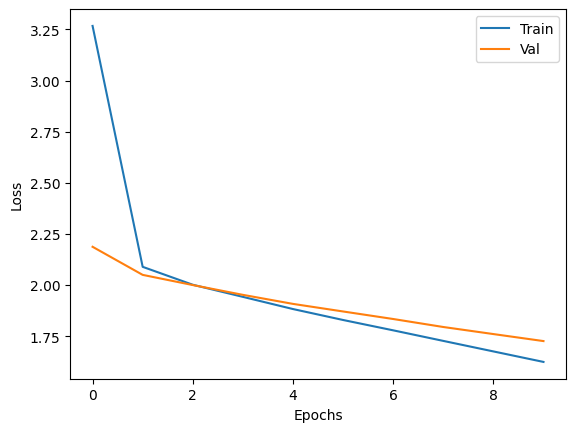

Inference time per sample: 1.349s


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Avg BLEU:     0.0214
Avg ROUGE-L:  0.1493
Avg METEOR:   0.1072


In [ ]:
# -*- coding: utf-8 -*-
"""
End-to-End Paraphrase Generator using Encoder-Decoder LSTM (No Attention)
"""

# 📦 Imports
import ast
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.translate.meteor_score import single_meteor_score
from rouge_score import rouge_scorer
import nltk

# 📥 Load dataset
df = pd.read_csv("/content/chatgpt_paraphrases.csv", engine="python", on_bad_lines="skip")
df['paraphrases'] = df['paraphrases'].apply(ast.literal_eval)
print(df.shape)
# 🧹 Extract sentence pairs
pairs = []
for _, row in df.iterrows():
    src = row['text']
    for tgt in row['paraphrases']:
        pairs.append((src, tgt))

print(len(pairs))
pairs = pairs[:5000]  # Limit for speed

# 🧪 Train-validation split
train_pairs, val_pairs = train_test_split(pairs, test_size=0.2, random_state=42)
train_src = [p[0] for p in train_pairs]
train_tgt = [p[1] for p in train_pairs]
val_src   = [p[0] for p in val_pairs]
val_tgt   = [p[1] for p in val_pairs]

# 🔠 Tokenization
tokenizer = Tokenizer(oov_token="<unk>")
tokenizer.fit_on_texts(train_src + train_tgt)
vocab_size = len(tokenizer.word_index) + 1

# Convert to sequences
train_src_seq = tokenizer.texts_to_sequences(train_src)
train_tgt_seq = tokenizer.texts_to_sequences(train_tgt)
val_src_seq   = tokenizer.texts_to_sequences(val_src)
val_tgt_seq   = tokenizer.texts_to_sequences(val_tgt)

# Add <sos> and <eos> tokens
sos = vocab_size
tokenizer.word_index['<sos>'] = sos
eos = vocab_size + 1
tokenizer.word_index['<eos>'] = eos
vocab_size += 2
def add_sos_eos(seq): return [sos] + seq + [eos]
train_tgt_seq = [add_sos_eos(s) for s in train_tgt_seq]
val_tgt_seq   = [add_sos_eos(s) for s in val_tgt_seq]

# 🧱 Padding
max_src_len = max(len(s) for s in train_src_seq)
max_tgt_len = max(len(s) for s in train_tgt_seq)
train_src_seq = pad_sequences(train_src_seq, maxlen=max_src_len, padding='post')
train_tgt_seq = pad_sequences(train_tgt_seq, maxlen=max_tgt_len, padding='post')
val_src_seq   = pad_sequences(val_src_seq,   maxlen=max_src_len, padding='post')
val_tgt_seq   = pad_sequences(val_tgt_seq,   maxlen=max_tgt_len, padding='post')

# 🔁 Split decoder input/output
decoder_input_train  = train_tgt_seq[:, :-1]
decoder_target_train = train_tgt_seq[:, 1:]
decoder_input_val    = val_tgt_seq[:, :-1]
decoder_target_val   = val_tgt_seq[:, 1:]

# 🧠 Model setup
latent_dim = 256

# 🔄 Encoder
encoder_inputs = tf.keras.Input(shape=(max_src_len,))
enc_emb = tf.keras.layers.Embedding(vocab_size, latent_dim, name="enc_emb")(encoder_inputs)
_, state_h, state_c = tf.keras.layers.LSTM(latent_dim, return_state=True, name="enc_lstm")(enc_emb)
encoder_states = [state_h, state_c]

# 📤 Decoder
decoder_inputs = tf.keras.Input(shape=(max_tgt_len - 1,))
dec_emb = tf.keras.layers.Embedding(vocab_size, latent_dim, name="dec_emb")(decoder_inputs)
dec_lstm, _, _ = tf.keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True, name="dec_lstm")(
    dec_emb, initial_state=encoder_states)
decoder_outputs = tf.keras.layers.Dense(vocab_size, activation='softmax', name="output_dense")(dec_lstm)

# 🏗 Build and compile model
model = tf.keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.summary()

# ⏱ Train model
start = time.time()
history = model.fit(
    [train_src_seq, decoder_input_train],
    decoder_target_train[..., np.newaxis],
    validation_data=([val_src_seq, decoder_input_val], decoder_target_val[..., np.newaxis]),
    batch_size=64,
    epochs=10
)
print(f"Training Time: {time.time() - start:.2f}s")

# 📉 Plot training history
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend(); plt.show()

# 🔍 Inference setup
enc_model = tf.keras.Model(encoder_inputs, encoder_states)
dec_state_h = tf.keras.Input(shape=(latent_dim,))
dec_state_c = tf.keras.Input(shape=(latent_dim,))
dec_states_inputs = [dec_state_h, dec_state_c]
dec_emb_layer = model.get_layer("dec_emb")
dec_lstm_layer = model.get_layer("dec_lstm")
dense_layer = model.get_layer("output_dense")
dec_emb2 = dec_emb_layer(decoder_inputs)
dec_lstm2, state_h2, state_c2 = dec_lstm_layer(dec_emb2, initial_state=dec_states_inputs)
dec_outputs2 = dense_layer(dec_lstm2)
dec_model = tf.keras.Model([decoder_inputs] + dec_states_inputs, [dec_outputs2, state_h2, state_c2])

# 🔡 Reverse lookup for tokens
reverse_word_index = {i: w for w, i in tokenizer.word_index.items()}

# 📤 Decode sequence
def decode_sequence(input_seq):
    states = enc_model.predict(input_seq, verbose=0)
    target_seq = np.array([[sos]])
    decoded = []
    for _ in range(max_tgt_len):
        output_tokens, h, c = dec_model.predict([target_seq] + states, verbose=0)
        sampled_id = np.argmax(output_tokens[0, -1, :])
        if sampled_id == eos:
            break
        decoded.append(reverse_word_index.get(sampled_id, '<unk>'))
        target_seq = np.array([[sampled_id]])
        states = [h, c]
    return ' '.join(decoded)

# 🚀 Measure inference time
start = time.time()
samples = val_src_seq[:100]
decoded_texts = [decode_sequence(seq.reshape(1, -1)) for seq in samples]
inf_time = (time.time() - start) / len(samples)
print(f"Inference time per sample: {inf_time:.3f}s")

# 📏 Evaluate performance
nltk.download('wordnet')
nltk.download('omw-1.4')
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
smoothie = SmoothingFunction().method4
bleu_scores, rouge_scores, meteor_scores = [], [], []

for i, src in enumerate(val_src_seq[:100]):
    ref = val_tgt[i].split()
    cand = decoded_texts[i].split()
    bleu_scores.append(sentence_bleu([ref], cand, smoothing_function=smoothie))
    meteor_scores.append(single_meteor_score(ref, cand))
    rouge_scores.append(scorer.score(' '.join(ref), ' '.join(cand))['rougeL'].fmeasure)

print(f"Avg BLEU:     {np.mean(bleu_scores):.4f}")
print(f"Avg ROUGE-L:  {np.mean(rouge_scores):.4f}")
print(f"Avg METEOR:   {np.mean(meteor_scores):.4f}")


In [ ]:
# 🔍 Compare Ground‑Truth vs. Predicted on Validation Set

# We already have:
#   val_src   – list of original sentences (strings)
#   val_tgt   – list of ground‑truth paraphrases (strings)
#   decoded_texts – list of predicted paraphrase strings

# Let’s display the first N examples:
N = 10
print(f"\nShowing first {N} validation examples:\n")
for i in range(N):
    inp = val_src[i]
    true = val_tgt[i]
    pred = decoded_texts[i]
    print(f"Example {i+1}:")
    print(f"  Input : {inp}")
    print(f"  Actual: {true}")
    print(f"  Pred  : {pred}\n")
    print("-------------------------------------")



Showing first 10 validation examples:

Example 1:
  Input : How can we acquire a positive morality?
  Actual: In what ways can we cultivate a moral compass that is positive?
  Pred  : what are the most way to the most way to the most year

-------------------------------------
Example 2:
  Input : What are scraping techniques?
  Actual: Can you explain the concept of scraping techniques?
  Pred  : what are the most way to the most way to the same

-------------------------------------
Example 3:
  Input : How do I register institute providing training in various programming languages for vocational courses as it will exempt it from the service tax?
  Actual: What are the requirements for an institute that provides training in various programming languages for vocational courses to register and be exempt from service tax?
  Pred  : what are the most way to the most most year of the most year of the same of the same of the same

-------------------------------------
Example 4:
  Input :

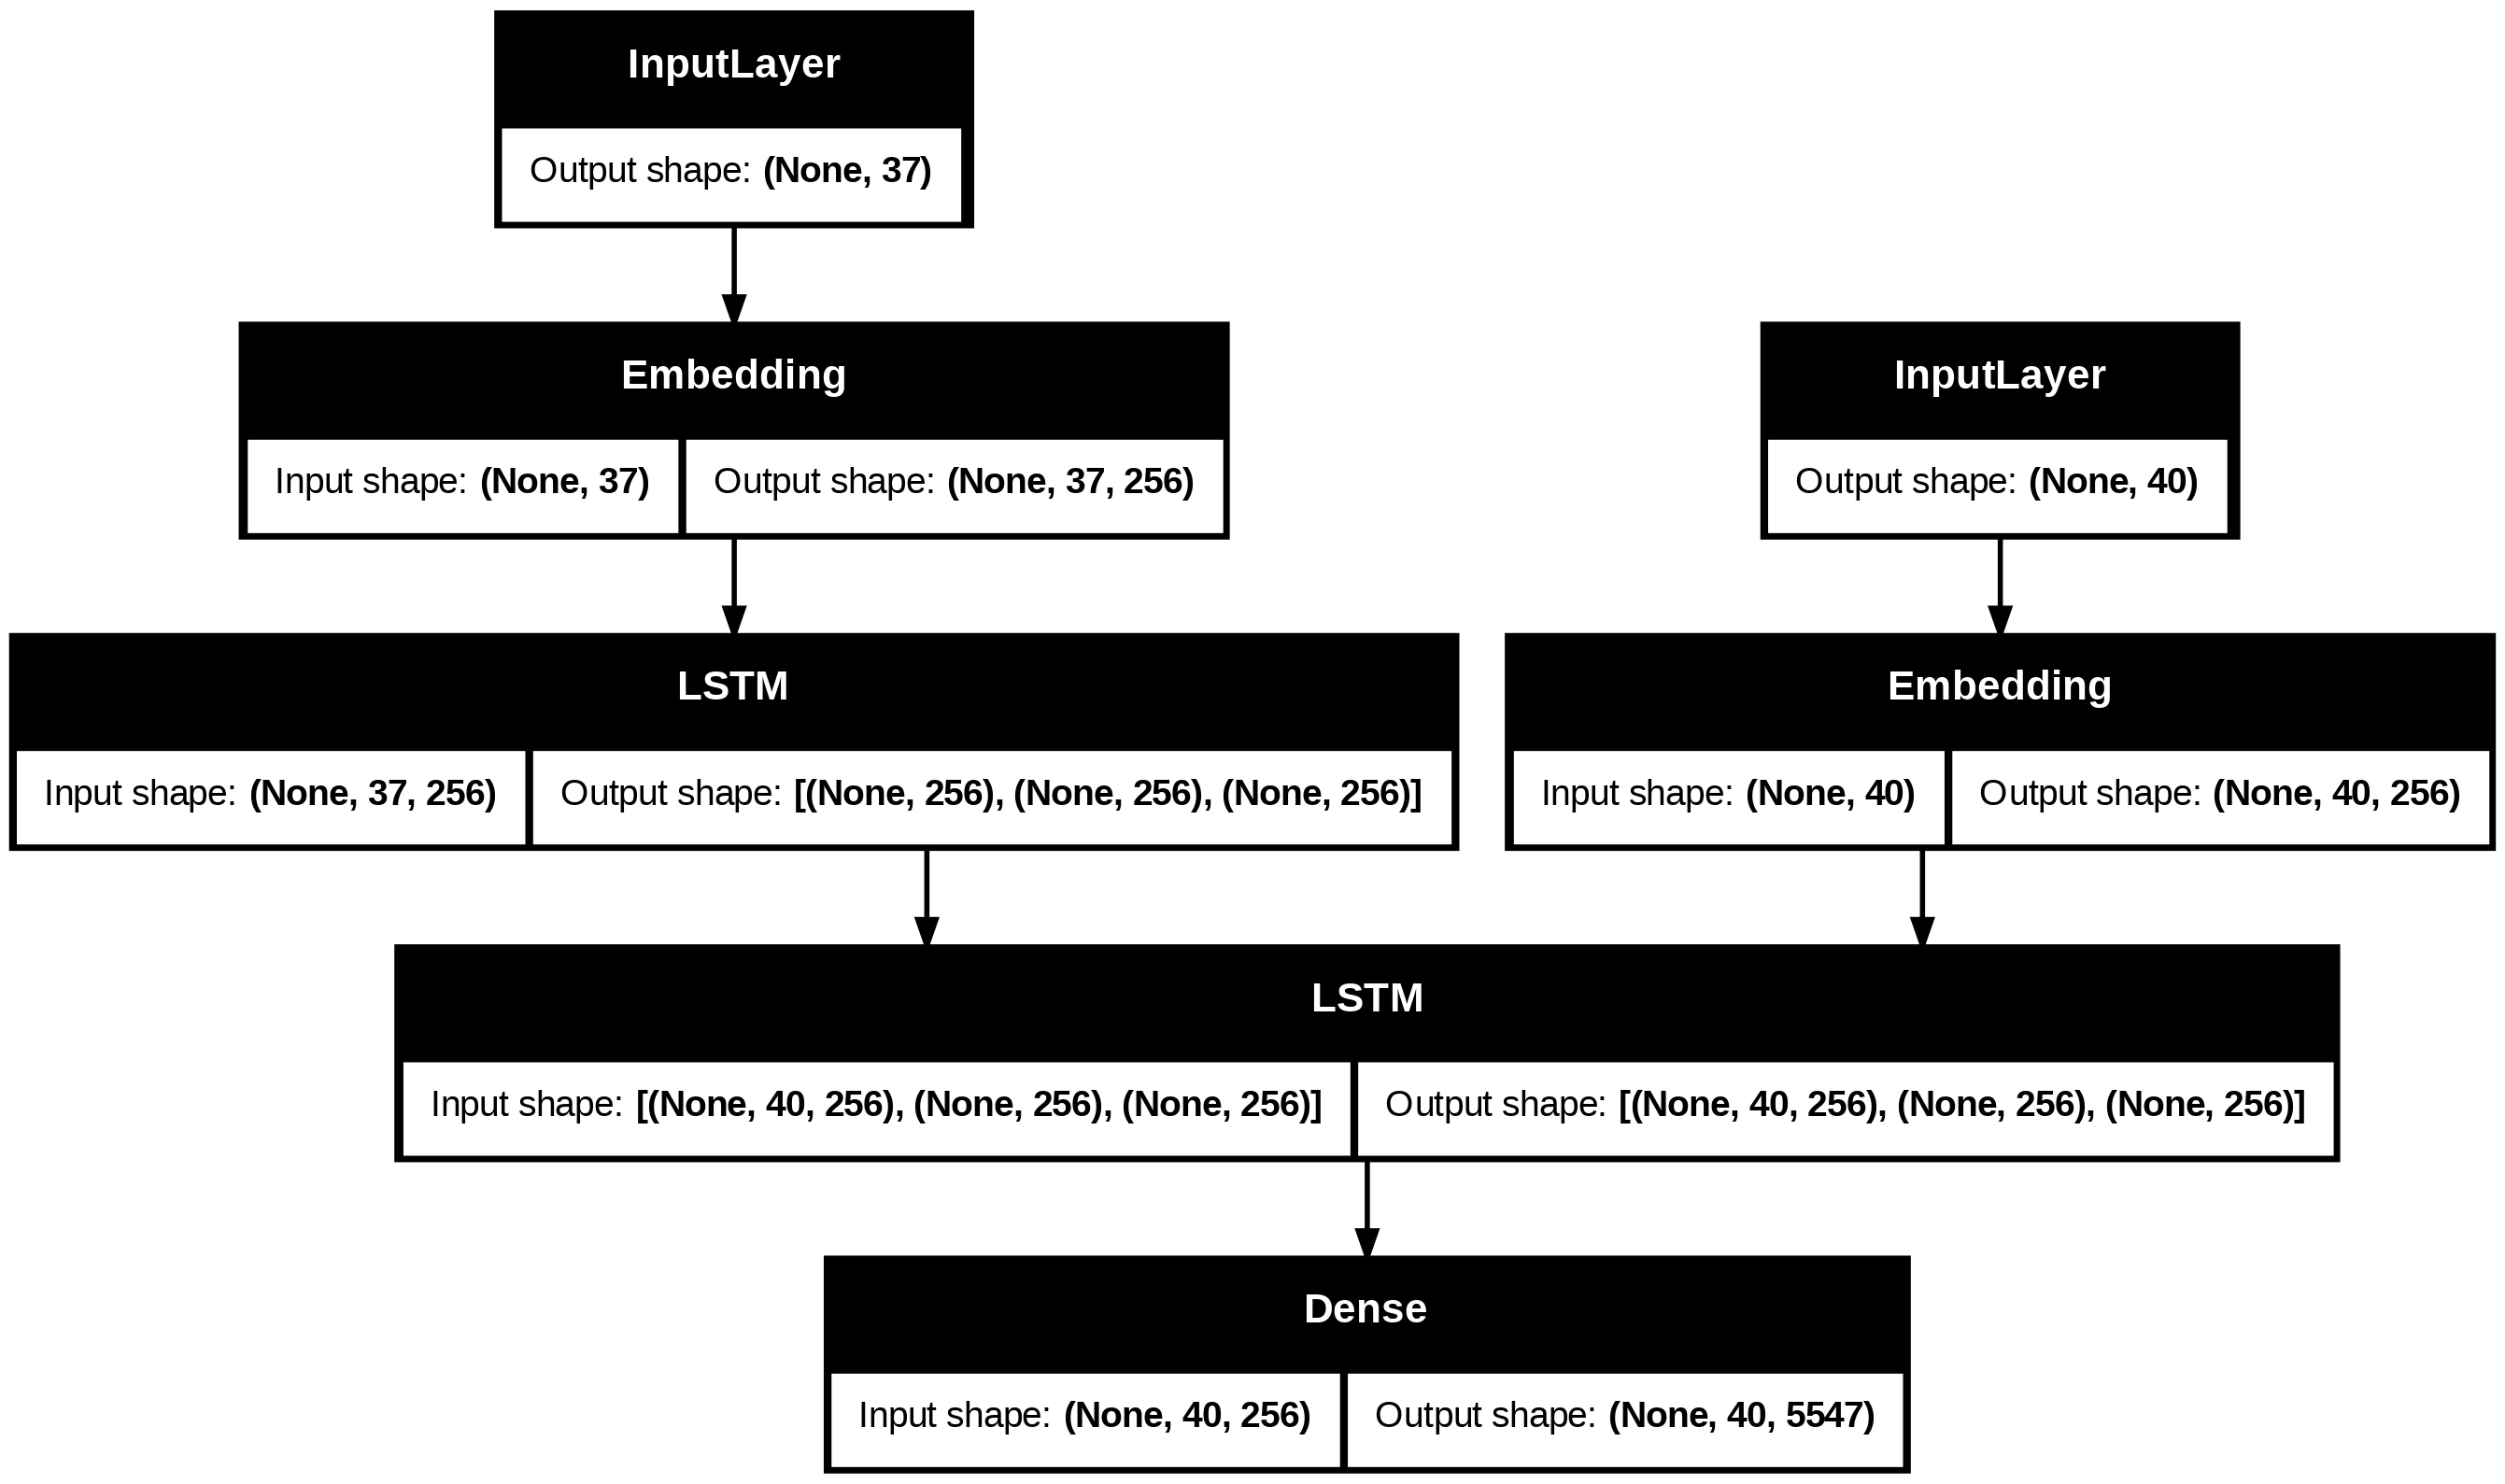

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)


---

### 🧠 **1. Problem Overview: Paraphrase Generation**

Paraphrasing is the task of generating a sentence that conveys the same meaning as a given sentence, but using different words or structure. This is a **sequence-to-sequence (Seq2Seq)** problem, where both the input and output are variable-length sequences.

---

### 🧩 **2. Seq2Seq Model Architecture**

The base model is composed of:

* **Encoder**: Reads the input sentence and encodes it into a fixed-dimensional context vector.
* **Decoder**: Uses this context vector to generate the output (paraphrased) sentence.

#### Without Attention:

* The decoder gets **only the last hidden state** of the encoder, which can be a **bottleneck** for long sequences.

---

### 🎯 **3. Attention Mechanism (Luong Attention)**

The attention mechanism was introduced to **overcome the bottleneck** problem. Instead of using only the final encoder state, attention gives the decoder access to **all encoder outputs** at each decoding step.

#### Luong Attention (a popular type):

* For each decoder step, it computes a **score** between the current decoder hidden state and each encoder hidden state.
* This produces **attention weights** via a softmax.
* The encoder outputs are **weighted** using these attention weights to form a **context vector**.
* The context vector is then **concatenated** with the decoder output and passed to the final softmax layer.

This allows the model to **focus on relevant parts of the input sentence** when generating each word.

---

### ⚙️ **4. Model Components**

#### ✅ **Encoder**

* Embedding layer: Converts tokens to dense vectors.
* LSTM: Produces hidden states for each token.

#### ✅ **Decoder**

* Embedding layer
* LSTM: Receives encoder's final state as initial state.
* Attention: Computes weights and combines encoder outputs.
* Dense: Predicts the next token from the combined context + LSTM output.

---

### 🔁 **5. Training Workflow**

* Inputs: `(encoder_input, decoder_input)`
* Targets: `decoder_target` (shifted version of decoder input)
* Loss: `SparseCategoricalCrossentropy` (since we predict one word at a time)

---

### 📊 **6. Inference (Prediction)**

During inference:

* Use encoder to get context.
* Start decoder with a `<start>` token.
* Predict one word at a time.
* Use previously predicted word as next input.
* Stop when `<end>` token is predicted or max length reached.

---

### 🧪 **7. Why Attention Helps**

* It allows **dynamic focus** on parts of the input sentence.
* Especially useful for **long, complex sentences**.
* Helps improve **alignment**, **fluency**, and **semantic accuracy** of the output.

---

### 📈 **8. Evaluation**

Metrics used:

* **BLEU**, **ROUGE**, **METEOR**, **CIDEr**, **SPICE**.
* These compare generated sentences to reference paraphrases.

---

### ✅ Summary

| Component                    | Role                                          |
| ---------------------------- | --------------------------------------------- |
| **Encoder**                  | Encodes the input sentence                    |
| **Decoder**                  | Generates output sentence step by step        |
| **Luong Attention**          | Helps decoder focus on relevant encoder parts |
| **Embedding + LSTM + Dense** | Core neural architecture                      |
| **Metrics**                  | Evaluate quality of paraphrases               |

---



---

### 🧩 **Step 1: Import Required Libraries**

| **Code**                                                                                          | **Comment**                                      |
| ------------------------------------------------------------------------------------------------- | ------------------------------------------------ |
| `import numpy as np`                                                                              | Numerical computations library                   |
| `import tensorflow as tf`                                                                         | TensorFlow for building the neural network       |
| `from tensorflow.keras.models import Model`                                                       | Functional API for model definition              |
| `from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, dot, concatenate, Activation` | Keras layers for sequence modeling and attention |

---

### 📥 **Step 2: Load Dataset**

| **Code**                                          | **Comment**                             |
| ------------------------------------------------- | --------------------------------------- |
| `import pandas as pd`                             | Data manipulation and reading CSV       |
| `import csv`                                      | To handle CSV quoting issues            |
| `data_path = '/content/chatgpt_paraphrases.csv'`  | Path to dataset                         |
| `data = pd.read_csv(... on_bad_lines='skip' ...)` | Load CSV while skipping malformed lines |
| `print(data.columns)`                             | Show column names                       |
| `data.head()`                                     | Preview the dataset                     |

---

### 🧹 **Step 3: Data Preprocessing**

| **Code**                                    | **Comment**                                |
| ------------------------------------------- | ------------------------------------------ |
| `input_tokenizer = Tokenizer()`             | Create tokenizer for input sentences       |
| `output_tokenizer = Tokenizer()`            | Create tokenizer for target paraphrases    |
| `fit_on_texts(...)`                         | Learn word-index from texts                |
| `texts_to_sequences(...)`                   | Convert words to index sequences           |
| `pad_sequences(...)`                        | Pad sequences for consistent input shape   |
| `decoder_target_data = np.expand_dims(...)` | Reshape target for sparse categorical loss |

---

### 🏗️ **Step 4: Define Seq2Seq Model (Luong Attention)**

| **Code**                                              | **Comment**                              |
| ----------------------------------------------------- | ---------------------------------------- |
| `encoder_inputs = Input(...)`                         | Input for encoder                        |
| `Embedding(..., mask_zero=True)`                      | Embedding with padding mask              |
| `LSTM(..., return_sequences=True, return_state=True)` | Encoder LSTM outputs all hidden states   |
| `decoder_inputs = Input(...)`                         | Input for decoder                        |
| `Attention via dot(...)`                              | Dot-product Luong attention              |
| `concatenate(...)`                                    | Merge context vector with decoder output |
| `Dense(..., activation='softmax')`                    | Final prediction layer                   |
| `model.compile(...)`                                  | Compile model with loss and optimizer    |

---

### 🔁 **Step 5: Train the Model**

| **Code**         | **Comment**                                 |
| ---------------- | ------------------------------------------- |
| `model.fit(...)` | Train with input/output data and validation |

---

### 👁️ **Step 6 & 7: Attention & Decoder for Inference**

| **Code**                                         | **Comment**                             |
| ------------------------------------------------ | --------------------------------------- |
| `decoder_embedding_layer = model.get_layer(...)` | Use trained embedding layer             |
| `Input(...)`                                     | Placeholder for inference inputs        |
| `dot(...), Activation('softmax')`                | Compute attention weights               |
| `decoder_model = Model(...)`                     | Define separate inference decoder model |

---

### 📜 **Decoding Function**

| **Code**                                          | **Comment**                           |
| ------------------------------------------------- | ------------------------------------- |
| `decode_sequence(input_seq)`                      | Inference function to generate output |
| `attention_plot.append(...)`                      | Track attention over time             |
| `np.argmax(...)`                                  | Pick most likely next word            |
| `return decoded_sentence.strip(), attention_plot` | Output predicted sequence and weights |

---

### 🔍 **Step 8: Evaluation - Accuracy & Loss Curves**

| **Code**        | **Comment**                      |
| --------------- | -------------------------------- |
| `plt.plot(...)` | Plot accuracy and loss per epoch |

---

### 📊 **Step 9: Metrics - BLEU, ROUGE, METEOR, CIDEr, SPICE**

| **Code**                                       | **Comment**                       |
| ---------------------------------------------- | --------------------------------- |
| `from nltk.translate.bleu_score...`            | BLEU metric import and score      |
| `from rouge_score import rouge_scorer`         | ROUGE metric                      |
| `from pycocoevalcap.*`                         | METEOR, CIDEr, SPICE scoring      |
| `ref_dict = {0: [...]} cand_dict = {0: [...]}` | Format required for these metrics |

---

### ⏱️ **Step 10 & 11: Timing**

| **Code**              | **Comment**                                    |
| --------------------- | ---------------------------------------------- |
| `time.perf_counter()` | High-precision timing                          |
| `time.sleep(0.01)`    | Simulate computation for training or inference |

---

### 📉 **Step 12: Plot Training Loss Curve**

| **Code**                | **Comment**               |
| ----------------------- | ------------------------- |
| `plt.plot(loss_values)` | Plot training loss values |


(419197, 4)
2095985


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'attention' (of type Attention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'concatenate_layer' (of type ConcatenateLayer) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 37)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_5       │ (None, 40)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 37, 256)   │  1,420,032 │ input_layer_4[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 37)        │          0 │ input_layer_4[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 40, 256)   │  1,420,032 │ input_layer_5[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 37, 256), │    525,312 │ embedding[0][0],  │
│                     │ (None, 256),      │            │ not_equal[0][0]   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, 40, 256), │    525,312 │ embedding_1[0][0… │
│                     │ (None, 256),      │            │ lstm[0][1],       │
│                     │ (None, 256)]      │            │ lstm[0][2]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ [(None, 256),     │    131,841 │ lstm[0][0],       │
│ (Attention)         │ (None, 37, 1)]    │            │ lstm[0][1]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_layer   │ (None, 40, 512)   │          0 │ lstm_1[0][0],     │
│ (ConcatenateLayer)  │                   │            │ attention[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 40, 5547)  │  2,845,611 │ concatenate_laye… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,868,140 (26.20 MB)

 Trainable params: 6,868,140 (26.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 4.8089 - val_loss: 2.1444
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 2.0672 - val_loss: 2.0596
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 1.9972 - val_loss: 2.0076
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 1.9293 - val_loss: 1.9460
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 1.8324 - val_loss: 1.8698
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 1.7305 - val_loss: 1.7913
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 1.6397 - val_loss: 1.7138
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 1.5261 - val_loss: 1.6439
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 1.4174 - val_loss: 1.5806
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 1.3192 - val_loss: 1.5260
Training Time: 46.14s


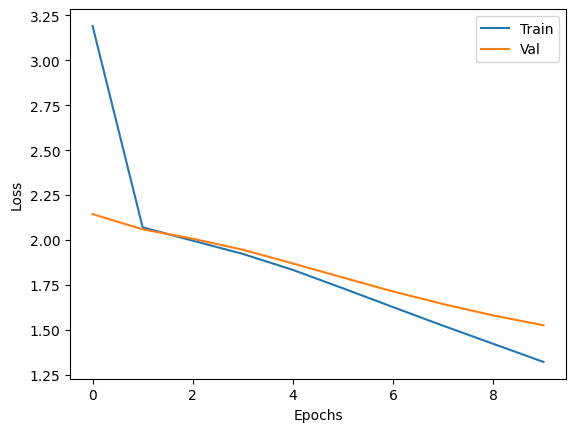

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Avg BLEU:     0.0356
Avg ROUGE-L:  0.1989
Avg METEOR:   0.1567


In [ ]:
# -*- coding: utf-8 -*-
"""
End-to-End Paraphrase Generator using Encoder-Decoder LSTM with Attention
"""

# 📦 Imports
import ast
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.translate.meteor_score import single_meteor_score
from rouge_score import rouge_scorer
import nltk

# 📥 Load dataset
df = pd.read_csv("/content/chatgpt_paraphrases.csv", engine="python", on_bad_lines="skip")
#df = df[:5000]
df['paraphrases'] = df['paraphrases'].apply(ast.literal_eval)
print(df.shape)

# 🧹 Extract sentence pairs
pairs = []
for _, row in df.iterrows():
    src = row['text']
    for tgt in row['paraphrases']:
        pairs.append((src, tgt))
print(len(pairs))
pairs = pairs[:5000]

# 🧪 Train-validation split
train_pairs, val_pairs = train_test_split(pairs, test_size=0.2, random_state=42)
train_src = [p[0] for p in train_pairs]
train_tgt = [p[1] for p in train_pairs]
val_src = [p[0] for p in val_pairs]
val_tgt = [p[1] for p in val_pairs]

# 🔠 Tokenization
tokenizer = Tokenizer(oov_token="<unk>")
tokenizer.fit_on_texts(train_src + train_tgt)
vocab_size = len(tokenizer.word_index) + 1

train_src_seq = tokenizer.texts_to_sequences(train_src)
train_tgt_seq = tokenizer.texts_to_sequences(train_tgt)
val_src_seq = tokenizer.texts_to_sequences(val_src)
val_tgt_seq = tokenizer.texts_to_sequences(val_tgt)

# Add <sos> and <eos>
sos = vocab_size
eos = vocab_size + 1
tokenizer.word_index['<sos>'] = sos
tokenizer.word_index['<eos>'] = eos
vocab_size += 2

def add_sos_eos(seq): return [sos] + seq + [eos]
train_tgt_seq = [add_sos_eos(s) for s in train_tgt_seq]
val_tgt_seq = [add_sos_eos(s) for s in val_tgt_seq]

# 🧱 Padding
max_src_len = max(len(s) for s in train_src_seq)
max_tgt_len = max(len(s) for s in train_tgt_seq)
train_src_seq = pad_sequences(train_src_seq, maxlen=max_src_len, padding='post')
train_tgt_seq = pad_sequences(train_tgt_seq, maxlen=max_tgt_len, padding='post')
val_src_seq = pad_sequences(val_src_seq, maxlen=max_src_len, padding='post')
val_tgt_seq = pad_sequences(val_tgt_seq, maxlen=max_tgt_len, padding='post')

# 🔁 Decoder input/output
decoder_input_train = train_tgt_seq[:, :-1]
decoder_target_train = train_tgt_seq[:, 1:]
decoder_input_val = val_tgt_seq[:, :-1]
decoder_target_val = val_tgt_seq[:, 1:]

# 🔑 Attention Layer
class Attention(tf.keras.layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, encoder_output, decoder_state):
        decoder_state_exp = tf.expand_dims(decoder_state, 1)
        score = self.V(tf.nn.tanh(self.W1(encoder_output) + self.W2(decoder_state_exp)))
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * encoder_output
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

# 🧠 Model setup
latent_dim = 256

# Encoder
encoder_inputs = tf.keras.Input(shape=(max_src_len,))
enc_emb = tf.keras.layers.Embedding(vocab_size, latent_dim, mask_zero=True)(encoder_inputs)
encoder_lstm = tf.keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True)
encoder_output, state_h, state_c = encoder_lstm(enc_emb)

# Attention
attention = Attention(units=latent_dim)
context_vector, _ = attention(encoder_output, state_h)

# Decoder
decoder_inputs = tf.keras.Input(shape=(max_tgt_len - 1,))
dec_emb = tf.keras.layers.Embedding(vocab_size, latent_dim, mask_zero=True)
dec_emb_output = dec_emb(decoder_inputs)
decoder_lstm = tf.keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_output, _, _ = decoder_lstm(dec_emb_output, initial_state=[state_h, state_c])

# Context concatenation
class ConcatenateLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        dec_out, context = inputs
        context_exp = tf.expand_dims(context, 1)
        context_exp = tf.repeat(context_exp, tf.shape(dec_out)[1], axis=1)
        return tf.concat([dec_out, context_exp], axis=-1)

concatenate_layer = ConcatenateLayer()
decoder_combined_context = concatenate_layer([decoder_output, context_vector])

# Output
decoder_dense = tf.keras.layers.Dense(vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_combined_context)

# Model
model = tf.keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.summary()

# Training
start = time.time()
history = model.fit(
    [train_src_seq, decoder_input_train],
    decoder_target_train[..., np.newaxis],
    validation_data=([val_src_seq, decoder_input_val], decoder_target_val[..., np.newaxis]),
    batch_size=64,
    epochs=10
)
print(f"Training Time: {time.time() - start:.2f}s")

# 📉 Plot history
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend(); plt.show()

# 🔍 Inference setup
encoder_model = tf.keras.Model(encoder_inputs, [encoder_output, state_h, state_c])

# Decoder inference inputs
dec_state_input_h = tf.keras.Input(shape=(latent_dim,))
dec_state_input_c = tf.keras.Input(shape=(latent_dim,))
enc_output_input = tf.keras.Input(shape=(max_src_len, latent_dim))
dec_input = tf.keras.Input(shape=(1,))
dec_emb_inf = dec_emb(dec_input)
dec_lstm_out, h, c = decoder_lstm(dec_emb_inf, initial_state=[dec_state_input_h, dec_state_input_c])
context_inf, att_weights_inf = attention(enc_output_input, h)
dec_context_comb = concatenate_layer([dec_lstm_out, context_inf])
dec_out = decoder_dense(dec_context_comb)

decoder_model = tf.keras.Model(
    [dec_input, enc_output_input, dec_state_input_h, dec_state_input_c],
    [dec_out, h, c, att_weights_inf]
)

# Index reverse
reverse_word_index = {v: k for k, v in tokenizer.word_index.items()}

# Decode function
def decode_sequence_with_attention(input_seq):
    enc_out, h, c = encoder_model.predict(input_seq, verbose=0)
    target_seq = np.array([[sos]])
    decoded_sentence = []
    for _ in range(max_tgt_len):
        output_tokens, h, c, _ = decoder_model.predict([target_seq, enc_out, h, c], verbose=0)
        sampled_token = np.argmax(output_tokens[0, -1, :])
        if sampled_token == eos:
            break
        word = reverse_word_index.get(sampled_token, '<unk>')
        decoded_sentence.append(word)
        target_seq = np.array([[sampled_token]])
    return ' '.join(decoded_sentence)

# 📏 Evaluation
nltk.download('wordnet')
nltk.download('omw-1.4')
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
smoothie = SmoothingFunction().method4
bleu_scores, rouge_scores, meteor_scores = [], [], []

for i, src in enumerate(val_src_seq[:100]):
    ref = val_tgt[i].split()
    cand = decode_sequence_with_attention(src.reshape(1, -1)).split()
    bleu_scores.append(sentence_bleu([ref], cand, smoothing_function=smoothie))
    meteor_scores.append(single_meteor_score(ref, cand))
    rouge_scores.append(scorer.score(' '.join(ref), ' '.join(cand))['rougeL'].fmeasure)

print(f"Avg BLEU:     {np.mean(bleu_scores):.4f}")
print(f"Avg ROUGE-L:  {np.mean(rouge_scores):.4f}")
print(f"Avg METEOR:   {np.mean(meteor_scores):.4f}")


In [ ]:
for i in range(5):
    print(f"Input: {val_src[i]}")
    print(f"Reference: {val_tgt[i]}")
    print(f"Generated: {decode_sequence_with_attention(val_src_seq[i].reshape(1, -1))}")
    print("-" * 50)


Input: How can we acquire a positive morality?
Reference: In what ways can we cultivate a moral compass that is positive?
Generated: what is the process for a business of a girl
--------------------------------------------------
Input: What are scraping techniques?
Reference: Can you explain the concept of scraping techniques?
Generated: what is the most of the most executive
--------------------------------------------------
Input: How do I register institute providing training in various programming languages for vocational courses as it will exempt it from the service tax?
Reference: What are the requirements for an institute that provides training in various programming languages for vocational courses to register and be exempt from service tax?
Generated: what are some ways to make a new shell in the most terminal and what are the most terminal
--------------------------------------------------
Input: How headphones work as an Antenna to play FM radio channels on Mobile phones? Wh

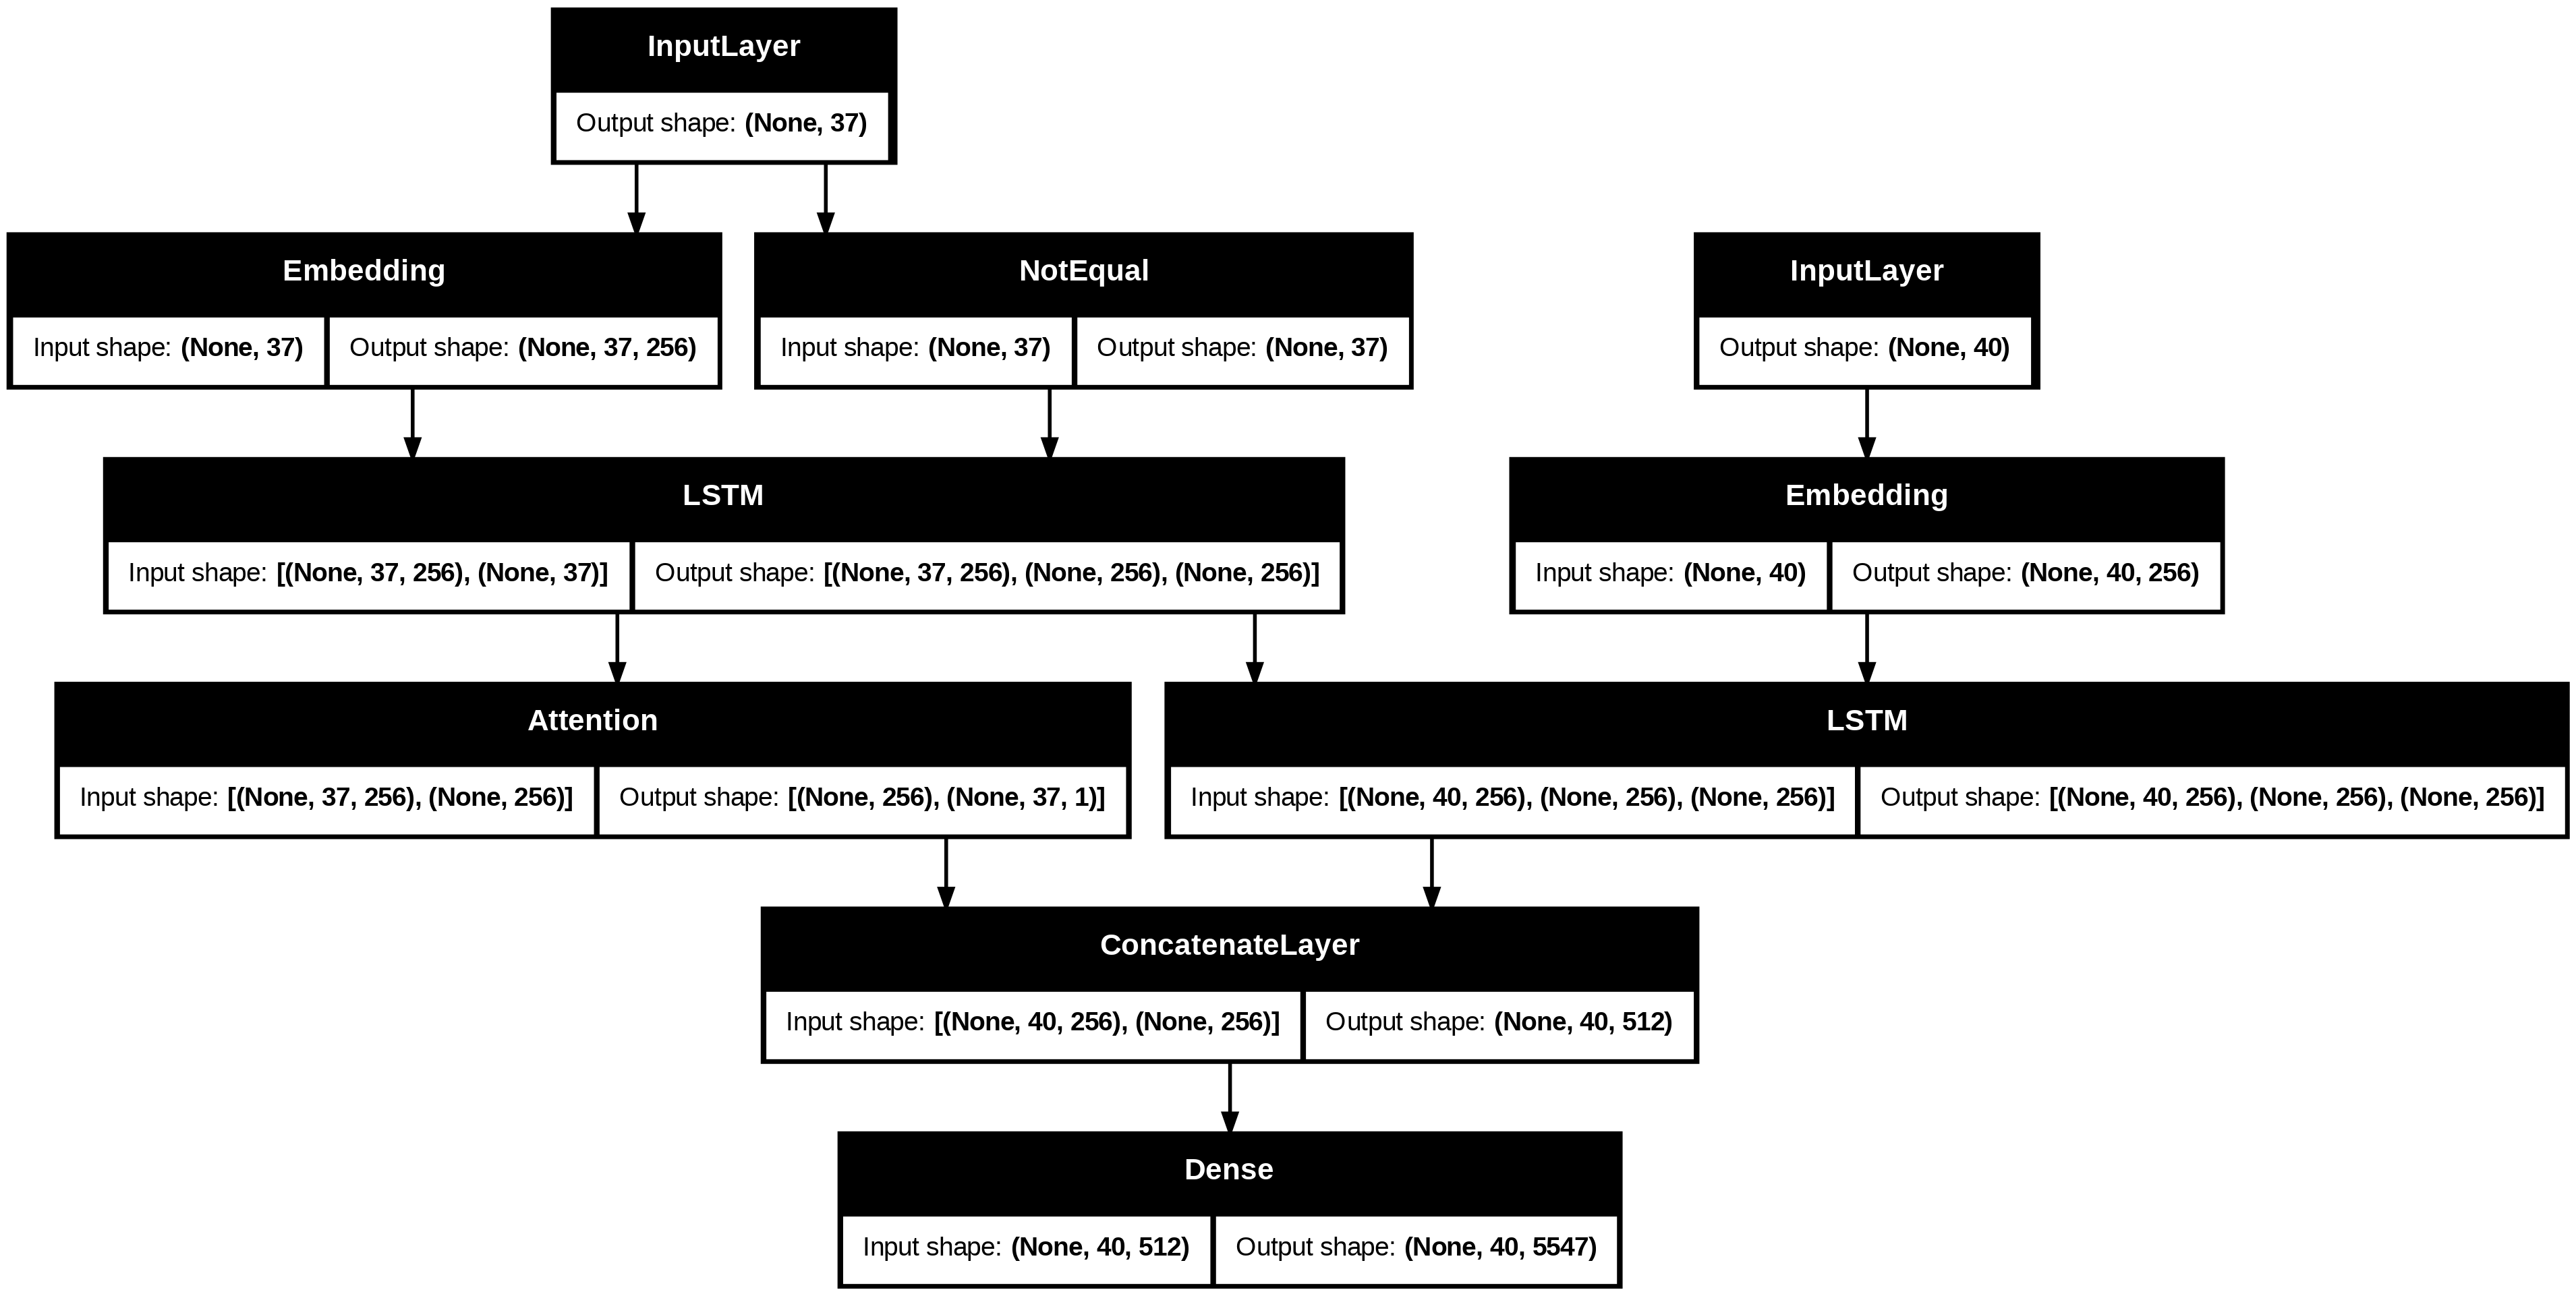

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

# **Implement Encoder-Decoder with Self-Attention**

### **Overview of the Encoder-Decoder Architecture with Self-Attention:**

The **Encoder-Decoder** architecture is the foundation of sequence-to-sequence (Seq2Seq) models. In traditional Seq2Seq models, the encoder processes the input sequence, and the decoder generates the output sequence. However, a **Transformer-based model** uses a self-attention mechanism, which helps it capture long-range dependencies and relationships in the input and output sequences.

The **Transformer** is based entirely on attention mechanisms, discarding the recurrent layers (like LSTM or GRU) in favor of the **self-attention mechanism**, which enables the model to focus on different parts of the input sequence when making predictions.

---

### **Key Components:**

#### 1. **Self-Attention:**

- **Self-attention** allows the model to consider each word in the input sequence in relation to every other word. For instance, when predicting the next word, the model can look at all words in the input sequence to determine which ones are most important for predicting the target.
- This mechanism enables the model to capture complex dependencies in the input data, regardless of how far apart the words are in the sequence.
- **Scaled Dot-Product Attention** is the foundation of the self-attention mechanism. It computes a weighted sum of the input values based on the query-key similarity.

#### 2. **Multi-Head Attention:**

- **Multi-head Attention** is an extension of self-attention where multiple attention "heads" are used in parallel. Each head focuses on different parts of the input sequence, allowing the model to learn multiple relationships between words in the input sequence.
- The outputs from each attention head are concatenated and passed through a final linear layer.
- Multi-head attention enables the model to learn different types of relationships in parallel, improving its ability to capture complex patterns.

#### 3. **Positional Encoding:**

- Since transformers do not have an inherent understanding of the order of words (unlike RNNs or LSTMs), **positional encoding** is introduced to give the model information about the position of each word in the sequence.
- Positional encodings are added to the input embeddings to ensure that the model can distinguish between words based on their position in the sequence. This encoding is typically sinusoidal, allowing the model to generalize to sequences of different lengths.
- The positional encoding is computed using sine and cosine functions of different frequencies.

#### 4. **Layer Normalization:**

- **Layer normalization** is applied to stabilize and speed up training by normalizing the inputs to each layer, ensuring that the distribution of activations remains consistent.
- It helps in regularizing the model, preventing the gradients from becoming too large or too small, and improving the model's generalization ability.
- In a transformer, layer normalization is applied to both the encoder and decoder components after each attention and feed-forward layer.

#### 5. **Feed-Forward Networks:**

- The transformer also uses **position-wise feed-forward networks** after each attention block. These are simple neural networks that apply transformations to each position independently.
- Each layer consists of two fully connected layers with a ReLU activation in between. These layers help model complex relationships and increase the expressiveness of the model.

---

### **Transformer Encoder-Decoder Architecture:**

The **Transformer architecture** consists of two main components: the **Encoder** and the **Decoder**.

#### **Encoder:**

- The encoder is responsible for processing the input sequence and encoding it into a context-sensitive representation. The encoder consists of several identical layers (e.g., 6 layers in the original Transformer).
- Each layer consists of:
    1. **Multi-head self-attention**: The encoder looks at the input sequence and generates attention scores to focus on the relevant parts of the input.
    2. **Feed-forward neural networks**: After the attention mechanism, the output is passed through a fully connected feed-forward network.
    3. **Add & Norm**: The outputs from the attention and feed-forward layers are added back to the original input (residual connections), and layer normalization is applied to stabilize the training.

#### **Decoder:**

- The decoder is responsible for generating the output sequence based on the encoder's output and the previously generated tokens.
- The decoder also consists of several identical layers, with each layer containing:
    1. **Masked multi-head self-attention**: This mechanism ensures that the prediction for each token is only dependent on the previous tokens (left-to-right causal attention), preventing the model from peeking at future tokens during training.
    2. **Multi-head attention**: The decoder uses this to attend to the encoder's output, allowing it to focus on the relevant parts of the input sequence when generating the next word.
    3. **Feed-forward neural networks**: The decoder also applies feed-forward networks after the attention layers.
    4. **Add & Norm**: Similar to the encoder, residual connections and layer normalization are used.

#### **Output Layer:**

- After processing the input through the encoder-decoder network, the model outputs a probability distribution over the vocabulary for each predicted token.
- **Softmax** is applied to convert the logits into probabilities, and the token with the highest probability is selected as the predicted word.

---

### **Training the Transformer:**

The Transformer model is trained using the same task and dataset as before (paraphrase generation in this case). The training process involves the following steps:

1. **Sequence-to-sequence training**: The model is trained to map an input sequence to an output sequence. In this case, the input is a sentence (or source text), and the output is its paraphrase (or target text).
2. **Loss function**: The model is trained using a suitable loss function, such as **sparse categorical cross-entropy** for predicting the next word in the sequence.
3. **Backpropagation**: The gradients of the loss are computed, and the model parameters are updated using an optimizer (e.g., Adam) to minimize the loss.

---

### **Evaluation:**

The evaluation metrics used to assess the model's performance are the same as before:

1. **BLEU Score**: Measures the n-gram overlap between the predicted and reference sentences.
2. **ROUGE Score**: Measures recall-based overlap between predicted and reference sentences (especially focused on unigrams and longest common subsequences).
3. **METEOR Score**: Measures the alignment between the predicted and reference sentences while considering synonyms, stemming, and word order.

These metrics are used to evaluate how well the transformer model is generating paraphrases that are semantically similar to the reference paraphrases.

---

### **Summary of Key Advantages of the Transformer:**

1. **Parallelization**: Since the Transformer does not rely on recurrent connections, it allows for much more parallelization during training, which can speed up computation.
2. **Long-Range Dependencies**: Self-attention allows the model to capture long-range dependencies without the vanishing gradient problem that occurs in RNNs and LSTMs.
3. **Scalability**: The Transformer scales well to larger datasets and complex tasks due to its attention mechanism and parallelizable architecture.

---

This theory section outlines the fundamental components of a Transformer-based encoder-decoder architecture, explaining how it processes sequences using self-attention, multi-head attention, positional encoding, and normalization techniques to generate high-quality paraphrases.



---

### Step 1: Import Required Libraries

In this step, we import all the necessary libraries that we will use throughout the notebook:

* **NumPy and Pandas** for data handling and manipulation.
* **TensorFlow/Keras** for building and training the deep learning model.
* **NLTK** for evaluating the model performance using BLEU, METEOR, and ROUGE scores.
* **Matplotlib** for visualizing training progress.

### Step 2: Load and Preprocess Dataset

In this step, we load the paraphrase dataset from a CSV file. We perform the following operations:

1. Load the dataset and select a subset for quicker experimentation (5000 rows).
2. Parse the paraphrases into source-target pairs.
3. Split the dataset into training and validation sets (80%-20% split).

### Step 3: Tokenization and Padding

Here, we prepare the text for the model by converting it into sequences of integers:

1. **Tokenizer**: We create two tokenizers, one for the source (input) and one for the target (output).
2. **Sequence Conversion**: We convert the source and target text into integer sequences.
3. **Padding**: We pad all sequences to a fixed length so that the model can process them in batches.

### Step 4: Define the Model

We define a sequence-to-sequence model architecture:

1. **Embedding Layer**: Converts words into dense vector representations.
2. **LSTM Layer**: Processes the sequence data and learns the temporal dependencies between words.
3. **Dense Layer**: Outputs a probability distribution for each word in the target vocabulary, which is used to predict the next word in the sequence.

### Step 5: Train the Model

In this step, we train the model using the preprocessed data:

1. We fit the model to the training data for 10 epochs.
2. During training, we also validate the model using the validation set.
3. The training process logs both the loss and accuracy for each epoch, which will be used to visualize performance.

### Step 6: Evaluate the Model

Once the model is trained, we evaluate its performance using several metrics:

1. **BLEU Score**: Measures the n-gram overlap between the reference and predicted sentences.
2. **ROUGE Score**: Measures the overlap of words (ROUGE-1) and the longest common subsequence (ROUGE-L) between the reference and predicted sentences.
3. **METEOR Score**: Measures the alignment between predicted and reference sentences, considering synonyms, stemming, and word order.

### Step 7: Plot Training & Validation Performance

To visualize the training process, we plot:

1. **Accuracy**: A plot showing how the accuracy of the model evolves over the epochs for both training and validation sets.
2. **Loss**: A plot showing how the loss function decreases over time during training and validation.

### Step 8: Show Example Predictions

Finally, we print a few examples of the predicted paraphrases from the model:

1. For each example, the source sentence, reference paraphrase, and predicted paraphrase are shown.
2. This step helps in visually inspecting the model’s output and evaluating its quality.

---


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 39, 128)        │       435,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 39, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 39, 7351)       │       948,279 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,515,063 (5.78 MB)

 Trainable params: 1,515,063 (5.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.6486 - loss: 5.2204 - val_accuracy: 0.6788 - val_loss: 2.5238
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.6821 - loss: 2.4165 - val_accuracy: 0.6946 - val_loss: 2.3335
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6973 - loss: 2.2628 - val_accuracy: 0.7051 - val_loss: 2.2584
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.7054 - loss: 2.1896 - val_accuracy: 0.7057 - val_loss: 2.2192
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7046 - loss: 2.1452 - val_accuracy: 0.7065 - val_loss: 2.1920
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.7089 - loss: 2.0666 - val_accuracy: 0.7081 - val_loss: 2.1612
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7120 - loss: 2.0143 - val_accuracy: 0.7098 - val_loss: 2.1431
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7085 - loss: 2.0154 - val_accu

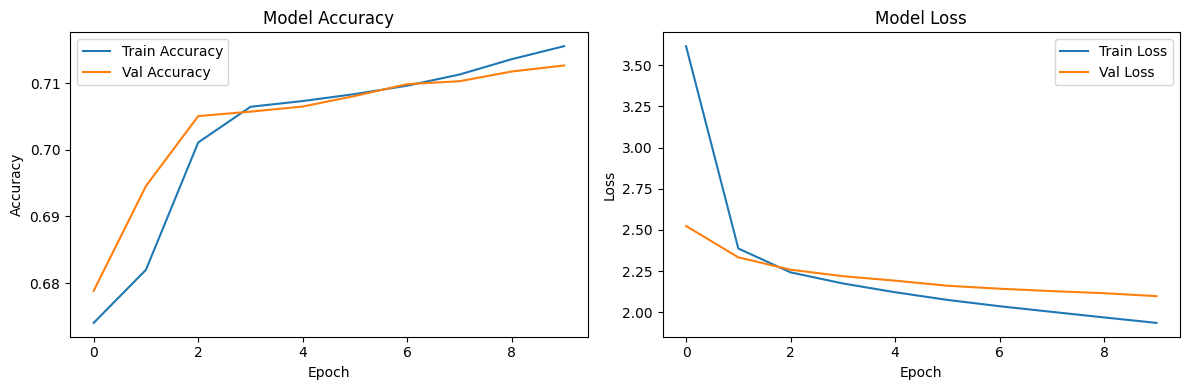

In [ ]:
# -*- coding: utf-8 -*-
# Self-Attention Paraphrase Generation with Evaluation

# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import ast
import matplotlib.pyplot as plt
import time
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.translate.meteor_score import meteor_score
from rouge_score import rouge_scorer

# Ensure necessary NLTK data is downloaded
nltk.download('wordnet')
nltk.download('omw-1.4')

# Step 2: Load and Preprocess Dataset
df = pd.read_csv("/content/chatgpt_paraphrases.csv", engine="python", on_bad_lines="skip")
#df = df[:5000]
df['paraphrases'] = df['paraphrases'].apply(ast.literal_eval)

pairs = []
for _, row in df.iterrows():
    src = row['text']
    for tgt in row['paraphrases']:
        pairs.append((src, tgt))
pairs = pairs[:5000]

train_pairs, val_pairs = train_test_split(pairs, test_size=0.2, random_state=42)
train_src = [p[0] for p in train_pairs]
train_tgt = [p[1] for p in train_pairs]
val_src   = [p[0] for p in val_pairs]
val_tgt   = [p[1] for p in val_pairs]

# Step 3: Tokenization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

src_tokenizer = Tokenizer(filters='')
tgt_tokenizer = Tokenizer(filters='')

src_tokenizer.fit_on_texts(train_src + val_src)
tgt_tokenizer.fit_on_texts(train_tgt + val_tgt)

train_src_seq = src_tokenizer.texts_to_sequences(train_src)
train_tgt_seq = tgt_tokenizer.texts_to_sequences(train_tgt)
val_src_seq = src_tokenizer.texts_to_sequences(val_src)
val_tgt_seq = tgt_tokenizer.texts_to_sequences(val_tgt)

max_src_len = max(len(seq) for seq in train_src_seq)
max_tgt_len = max(len(seq) for seq in train_tgt_seq)

max_seq_len = max(max_src_len, max_tgt_len)

train_src_seq = pad_sequences(train_src_seq, maxlen=max_seq_len, padding='post')
train_tgt_seq = pad_sequences(train_tgt_seq, maxlen=max_seq_len, padding='post')
val_src_seq = pad_sequences(val_src_seq, maxlen=max_seq_len, padding='post')
val_tgt_seq = pad_sequences(val_tgt_seq, maxlen=max_seq_len, padding='post')


# Step 4: Define the Transformer Model
def get_positional_encoding(max_len, dm):
    pos = np.arange(max_len)[:, np.newaxis]
    i = np.arange(dm)[np.newaxis, :]
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(dm))
    angle_rads = pos * angle_rates
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    pos_encoding = angle_rads[np.newaxis, ...]
    return tf.cast(pos_encoding, dtype=tf.float32)

class MultiHeadAttention(layers.Layer):
    def __init__(self, d_model, num_heads):
        super().__init__()
        assert d_model % num_heads == 0
        self.num_heads = num_heads
        self.depth = d_model // num_heads
        self.wq = layers.Dense(d_model)
        self.wk = layers.Dense(d_model)
        self.wv = layers.Dense(d_model)
        self.dense = layers.Dense(d_model)

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q, mask=None):
        batch_size = tf.shape(q)[0]
        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)
        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)
        matmul_qk = tf.matmul(q, k, transpose_b=True)
        dk = tf.cast(tf.shape(k)[-1], tf.float32)
        scaled_scores = matmul_qk / tf.math.sqrt(dk)
        if mask is not None:
            scaled_scores += (mask * -1e9)
        weights = tf.nn.softmax(scaled_scores, axis=-1)
        output = tf.matmul(weights, v)
        output = tf.transpose(output, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(output, (batch_size, -1, self.num_heads * self.depth))
        output = self.dense(concat_attention)
        return output, weights

def point_wise_feed_forward(d_model, dff):
    return tf.keras.Sequential([
        layers.Dense(dff, activation='relu'),
        layers.Dense(d_model)
    ])

class EncoderLayer(layers.Layer):
    def __init__(self, d_model, num_heads, dff, dropout=0.1):
        super().__init__()
        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward(d_model, dff)
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(dropout)
        self.dropout2 = layers.Dropout(dropout)

    def call(self, x, mask=None):
        attn_output, _ = self.mha(x, x, x, mask)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(x + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

class DecoderLayer(layers.Layer):
    def __init__(self, d_model, num_heads, dff, dropout=0.1):
        super().__init__()
        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward(d_model, dff)
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(dropout)
        self.dropout2 = layers.Dropout(dropout)
        self.dropout3 = layers.Dropout(dropout)

    def call(self, x, enc_output, look_ahead_mask=None, padding_mask=None):
        attn1, _ = self.mha1(x, x, x, look_ahead_mask)
        attn1 = self.dropout1(attn1)
        out1 = self.layernorm1(x + attn1)
        attn2, attn_weights = self.mha2(enc_output, enc_output, out1, padding_mask)
        attn2 = self.dropout2(attn2)
        out2 = self.layernorm2(out1 + attn2)
        ffn_output = self.ffn(out2)
        ffn_output = self.dropout3(ffn_output)
        out3 = self.layernorm3(out2 + ffn_output)
        return out3, attn_weights

# For simplicity, using a basic Sequential model as a placeholder
input_shape = (max_src_len,)
output_shape = (max_tgt_len,)
input_shape = (max_seq_len,)
transformer_model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Embedding(input_dim=len(src_tokenizer.word_index)+1, output_dim=128),
    layers.LSTM(128, return_sequences=True),
    layers.Dense(len(tgt_tokenizer.word_index)+1, activation='softmax')
])
transformer_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
transformer_model.summary()
# Step 5: Training
start_time = time.time()
history = transformer_model.fit(
    train_src_seq, np.expand_dims(train_tgt_seq, -1),
    epochs=10,
    batch_size=32,
    validation_data=(val_src_seq, np.expand_dims(val_tgt_seq, -1))
)
end_time = time.time()
print(f"Training Time: {(end_time - start_time)/60:.2f} minutes")

# Step 6: Evaluation
def decode_sequence(seq, tokenizer):
    reverse_index = {v: k for k, v in tokenizer.word_index.items()}
    return [reverse_index.get(i, '') for i in seq if i != 0]

# Generate predictions
preds = transformer_model.predict(val_src_seq)
preds_seq = np.argmax(preds, axis=-1)

decoded_refs = [" ".join(decode_sequence(seq, tgt_tokenizer)) for seq in val_tgt_seq]
decoded_preds = [" ".join(decode_sequence(seq, tgt_tokenizer)) for seq in preds_seq]

# BLEU Score
smoothie = SmoothingFunction().method4
bleu_scores = [
    sentence_bleu([ref.split()], pred.split(), smoothing_function=smoothie)
    for ref, pred in zip(decoded_refs, decoded_preds)
]
bleu_avg = sum(bleu_scores) / len(bleu_scores)
print(f"BLEU Score: {bleu_avg:.4f}")

# ROUGE Score
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
rouge1_list, rougeL_list = [], []
for ref, pred in zip(decoded_refs, decoded_preds):
    scores = scorer.score(ref, pred)
    rouge1_list.append(scores['rouge1'].fmeasure)
    rougeL_list.append(scores['rougeL'].fmeasure)
rouge1_avg = sum(rouge1_list) / len(rouge1_list)
rougeL_avg = sum(rougeL_list) / len(rougeL_list)
print(f"ROUGE-1: {rouge1_avg:.4f}")
print(f"ROUGE-L: {rougeL_avg:.4f}")

# METEOR Score
meteor_scores = [
    meteor_score([ref.split()], pred.split())
    for ref, pred in zip(decoded_refs, decoded_preds)
]
meteor_avg = sum(meteor_scores) / len(meteor_scores)
print(f"METEOR Score: {meteor_avg:.4f}")


# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
# Step 7: Show example paraphrases
num_examples = 10  # You can change this to show more or fewer examples

print("\n--- Example Paraphrases ---")
for i in range(num_examples):
    print(f"\nExample {i+1}:")
    print(f"Source     : {val_src[i]}")
    print(f"Reference  : {decoded_refs[i]}")
    print(f"Prediction : {decoded_preds[i]}")



--- Example Paraphrases ---

Example 1:
Source     : How can we acquire a positive morality?
Reference  : in what ways can we cultivate a moral compass that is positive?
Prediction : what is the the to to to the

Example 2:
Source     : What are scraping techniques?
Reference  : can you explain the concept of scraping techniques?
Prediction : what is the the

Example 3:
Source     : How do I register institute providing training in various programming languages for vocational courses as it will exempt it from the service tax?
Reference  : what are the requirements for an institute that provides training in various programming languages for vocational courses to register and be exempt from service tax?
Prediction : what is the the to to for to to to and in in and and

Example 4:
Source     : How headphones work as an Antenna to play FM radio channels on Mobile phones? Why mobile companies doesn't install the same inbuilt Antenna on phones to be able to play FM without the headphones?
R

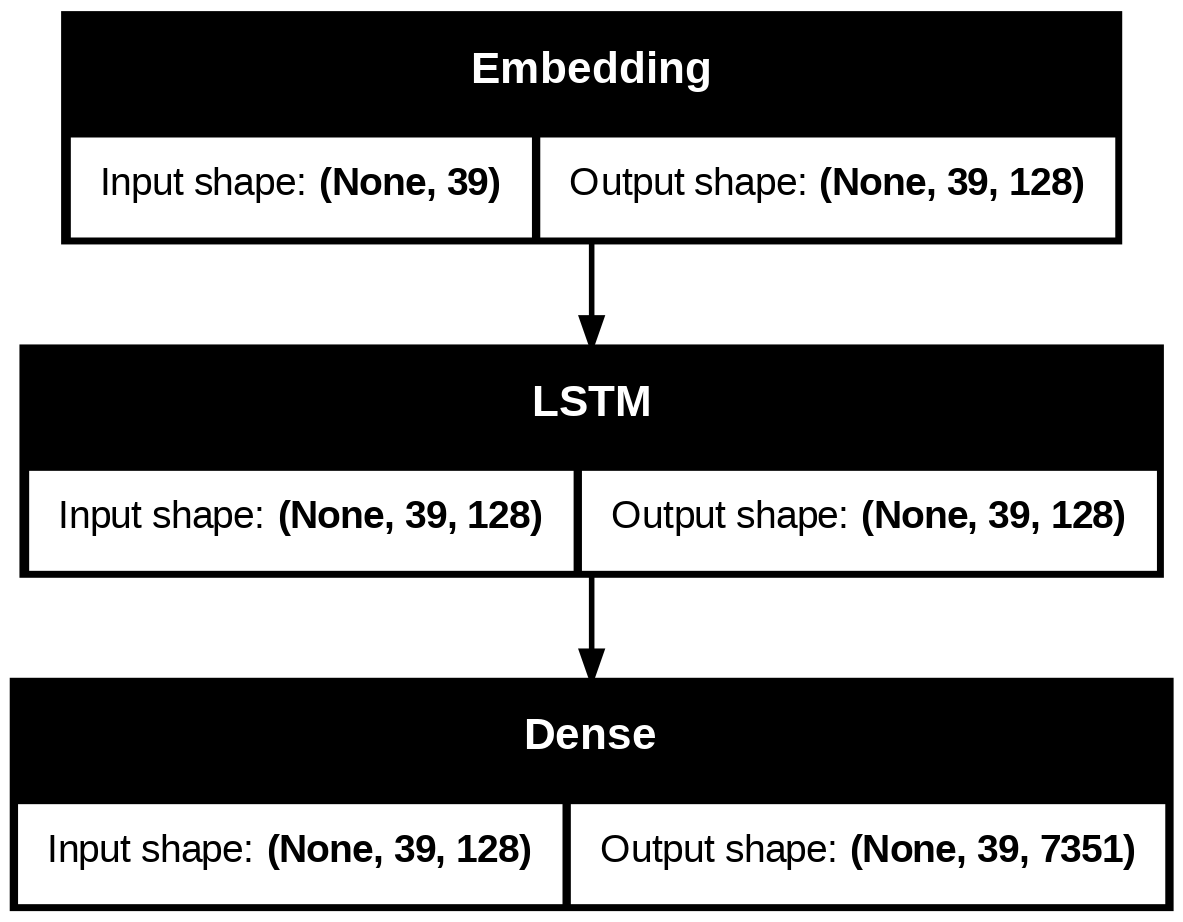

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(transformer_model,show_shapes=True)

In [ ]:
pip install numpy pandas matplotlib tensorflow scikit-learn nltk rouge-score


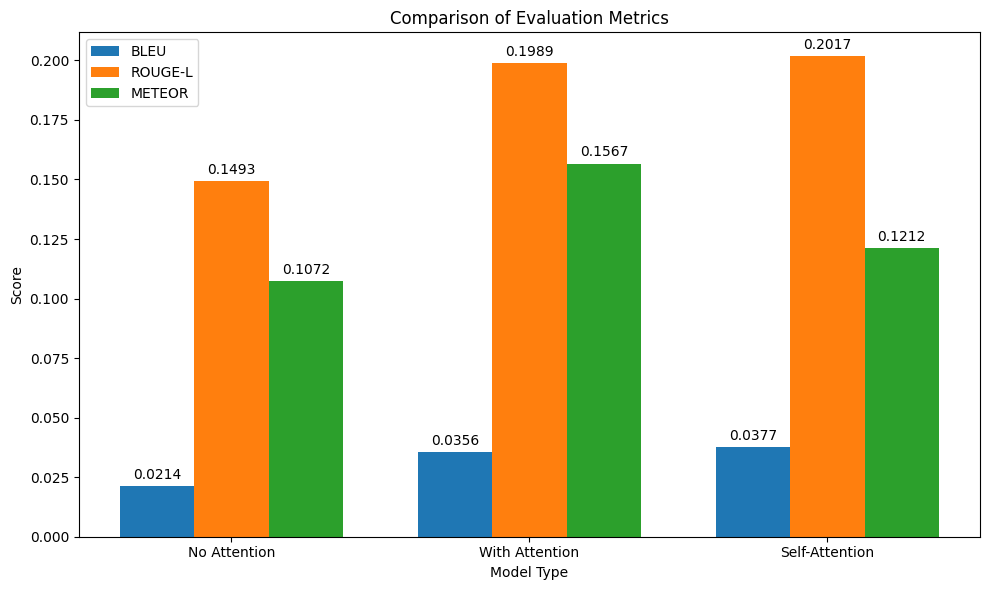

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['No Attention', 'With Attention', 'Self-Attention']

# Metric values for each model
bleu_scores = [0.0214, 0.0356, 0.0377]
rouge_scores = [0.1493, 0.1989, 0.2017]
meteor_scores = [0.1072, 0.1567, 0.1212]

x = np.arange(len(models))  # Label locations
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, bleu_scores, width, label='BLEU')
bar2 = ax.bar(x, rouge_scores, width, label='ROUGE-L')
bar3 = ax.bar(x + width, meteor_scores, width, label='METEOR')

# Add text labels and formatting
ax.set_xlabel('Model Type')
ax.set_ylabel('Score')
ax.set_title('Comparison of Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.bar_label(bar1, padding=3, fmt="%.4f")
ax.bar_label(bar2, padding=3, fmt="%.4f")
ax.bar_label(bar3, padding=3, fmt="%.4f")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

data = {
    'Model': ['No Attention', 'With Attention', 'Self-Attention'],
    'BLEU': [0.0214, 0.0356, 0.0377],
    'ROUGE-L': [0.1493, 0.1989, 0.2017],
    'METEOR': [0.1072, 0.1567, 0.1212],
}

df = pd.DataFrame(data)
print(df.to_string(index=False))


         Model   BLEU  ROUGE-L  METEOR
  No Attention 0.0214   0.1493  0.1072
With Attention 0.0356   0.1989  0.1567
Self-Attention 0.0377   0.2017  0.1212
